In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xradar as xd
import pyart

import glob

hour = '19'
day = '25'
month = '08'
year = '2022'
base_path = "/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/"

# Files
glob_str = f"{base_path}{year}{month}/gucxprecipradarcmacS2.c1.{year}{month}{day}.{hour}*"
files = sorted(glob.glob(glob_str))
print(f'Found {len(files)} files in {glob_str}')
files


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/ccsopen/home/braut/analysis-env2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 10 files in /gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.19*


['/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.190443.nc',
 '/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.191043.nc',
 '/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.191643.nc',
 '/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.192243.nc',
 '/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.192843.nc',
 '/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.193443.nc',
 '/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.194043.nc',
 '/gpfs/wolf2/arm/atm124/world-shared/gucxprecipradarcmacS2.c1/ppi/202208/gucxprecipradarcmacS2.c1.20220825.194643.nc',
 '/gpfs/wolf2/arm/atm124/world-shared/gu

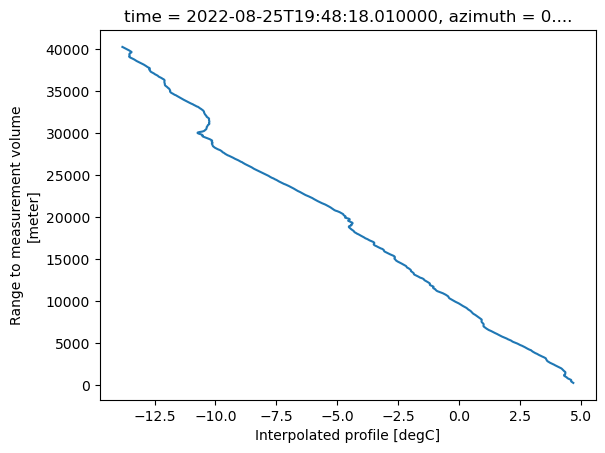

In [2]:
file_name = files[-3]
radar = xd.io.open_cfradial1_datatree(file_name)
geo_ds = xd.georeference.get_x_y_z(radar['sweep_2'].to_dataset())
geo_ds.sounding_temperature[0, :].plot(y='range')


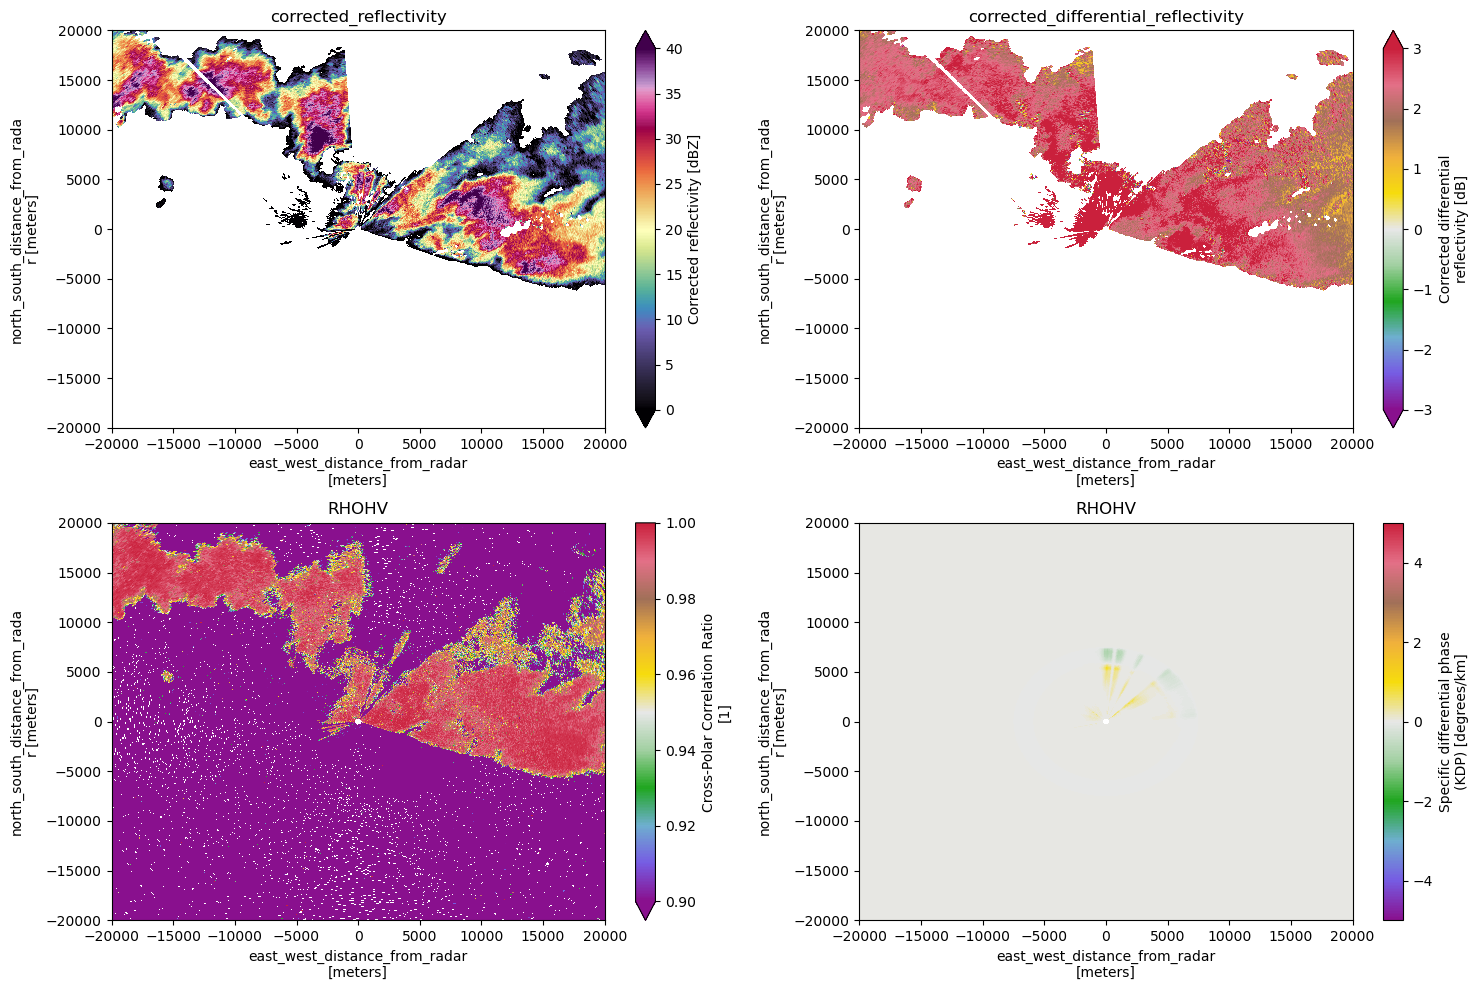

In [3]:
var = ['corrected_reflectivity', 'corrected_differential_reflectivity', 'RHOHV', 'corrected_specific_diff_phase']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

geo_ds[var[0]].plot(ax=axes[0], x='x', y='y', cmap='pyart_ChaseSpectral', vmin=0, vmax=40, robust=True)
axes[0].set_title(var[0])
axes[0].set_xlim(-20_000, 20_000)
axes[0].set_ylim(-20_000, 20_000)

geo_ds[var[1]].plot(ax=axes[1], x='x', y='y', cmap='pyart_Carbone11', vmin=-3, vmax=3, robust=True)
axes[1].set_title(var[1])
axes[1].set_xlim(-20_000, 20_000)
axes[1].set_ylim(-20_000, 20_000)

geo_ds[var[2]].plot(ax=axes[2], x='x', y='y', cmap='pyart_Carbone11', vmin=0.9, vmax=1, robust=True)
axes[2].set_title(var[2])
axes[2].set_xlim(-20_000, 20_000)
axes[2].set_ylim(-20_000, 20_000)

geo_ds[var[3]].plot(ax=axes[3], x='x', y='y', cmap='pyart_Carbone11', vmin=-5, vmax=5, robust=True)
axes[3].set_title(var[2])
axes[3].set_xlim(-20_000, 20_000)
axes[3].set_ylim(-20_000, 20_000)

plt.tight_layout()
plt.show()

In [4]:
import matplotlib.colors as colors
from csu_radartools import csu_fhc

In [5]:

# Mapping from CSU indices to UHID values:
# CSU: [NA, DZ (1), RN (2), CR (3), AG (4), WS (5), VI (6), LDG (7), HDG (8), HL (9), BD (10)]
# SN:  [ 0, 1,   4,   1,   2,   7,   6,   11,  12,   13,  14]
csu_to_sn = np.array([0, 3, 4, 1, 2, 7, 6, 11, 12, 13, 14])

# Mapping from Py-ART indices to UHID values:
# Py-ART: [DS (0), CR (1), LR (2), RP (3), RN (4), VI (5), WS (6), MH (7), HDG (8)]
# SN:     [ 8,    1,   3,   5,   4,   6,   7,   9,   12]
pyart_to_sn = np.array([0, 8, 1, 3, 5, 4, 6, 7, 9, 12])

def get_radar_files(hour, day, month, year, base_path="/Users/bhupendra/projects/sail/data/gucxprecip/"):
    glob_str = f"{base_path}{year}{month}/gucxprecipradarcmacS2.c1.{year}{month}{day}.{hour}*"
    files = sorted(glob.glob(glob_str))
    print(f'in {glob_str}, {len(files)}')
    return files

def load_and_prepare_radar(files, sweep=0):
    radar = pyart.io.read(files)
    radar = radar.extract_sweeps([sweep])
    return radar

def add_field_to_radar_object(field, radar, field_name='field', units='unitless', long_name='Field', standard_name='Field', dz_field='ZC'):
    fill_value = -32768
    masked_field = np.ma.asanyarray(field)
    masked_field.mask = masked_field == fill_value
    if hasattr(radar.fields[dz_field]['data'], 'mask'):
        setattr(masked_field, 'mask', np.logical_or(masked_field.mask, radar.fields[dz_field]['data'].mask))
        fill_value = radar.fields[dz_field]['_FillValue']
    field_dict = {'data': masked_field, 'units': units, 'long_name': long_name, 'standard_name': standard_name, '_FillValue': fill_value}
    radar.add_field(field_name, field_dict, replace_existing=True)
    return radar

def csu_fhc_classification(radar):
    dbz = radar.fields['corrected_reflectivity']['data']
    zdr = radar.fields['corrected_differential_reflectivity']['data']
    kdp = radar.fields['corrected_specific_diff_phase']['data']
    rhv = radar.fields['RHOHV']['data']
    rtemp = radar.fields['sounding_temperature']['data']

    scores = csu_fhc.csu_fhc_summer(dz=dbz, zdr=zdr, rho=rhv, kdp=kdp, use_temp=True, band='X', T=rtemp)

    # Map CSU scores to table
    mapped_scores = csu_to_sn[scores]

    radar = add_field_to_radar_object(mapped_scores, radar, field_name='csu_fhc_scores', dz_field='corrected_reflectivity')
    return radar

def pyart_hydro_classification(radar):
    hydromet_class = pyart.retrieve.hydroclass_semisupervised(
        radar,
        refl_field="corrected_reflectivity",
        zdr_field="corrected_differential_reflectivity",
        kdp_field="filtered_corrected_specific_diff_phase",
        rhv_field="RHOHV",
        temp_field="sounding_temperature",
        radar_freq=9.2e9
    )

    # Map Py-ART classifications
    mapped_hydromet_class = pyart_to_sn[hydromet_class['data']]

    hydromet_class['data'] = mapped_hydromet_class
    radar.add_field("pyart_besic_hclass", hydromet_class, replace_existing=True)
    return radar


In [6]:



radar = load_and_prepare_radar(file_name, sweep=2)
radar = csu_fhc_classification(radar)
radar = pyart_hydro_classification(radar)

/ccsopen/home/braut/analysis-env2/lib/python3.10/site-packages/pyart/io/cfradial.py:424: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/ccsopen/home/braut/analysis-env2/lib/python3.10/site-packages/pyart/io/cfradial.py:424: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/ccsopen/home/braut/analysis-env2/lib/python3.10/site-packages/pyart/retrieve/echo_class.py:682: UserWarning: Radar instrument parameters are empty. Using user-supplied radar frequency: 9200000000.0
  warn(


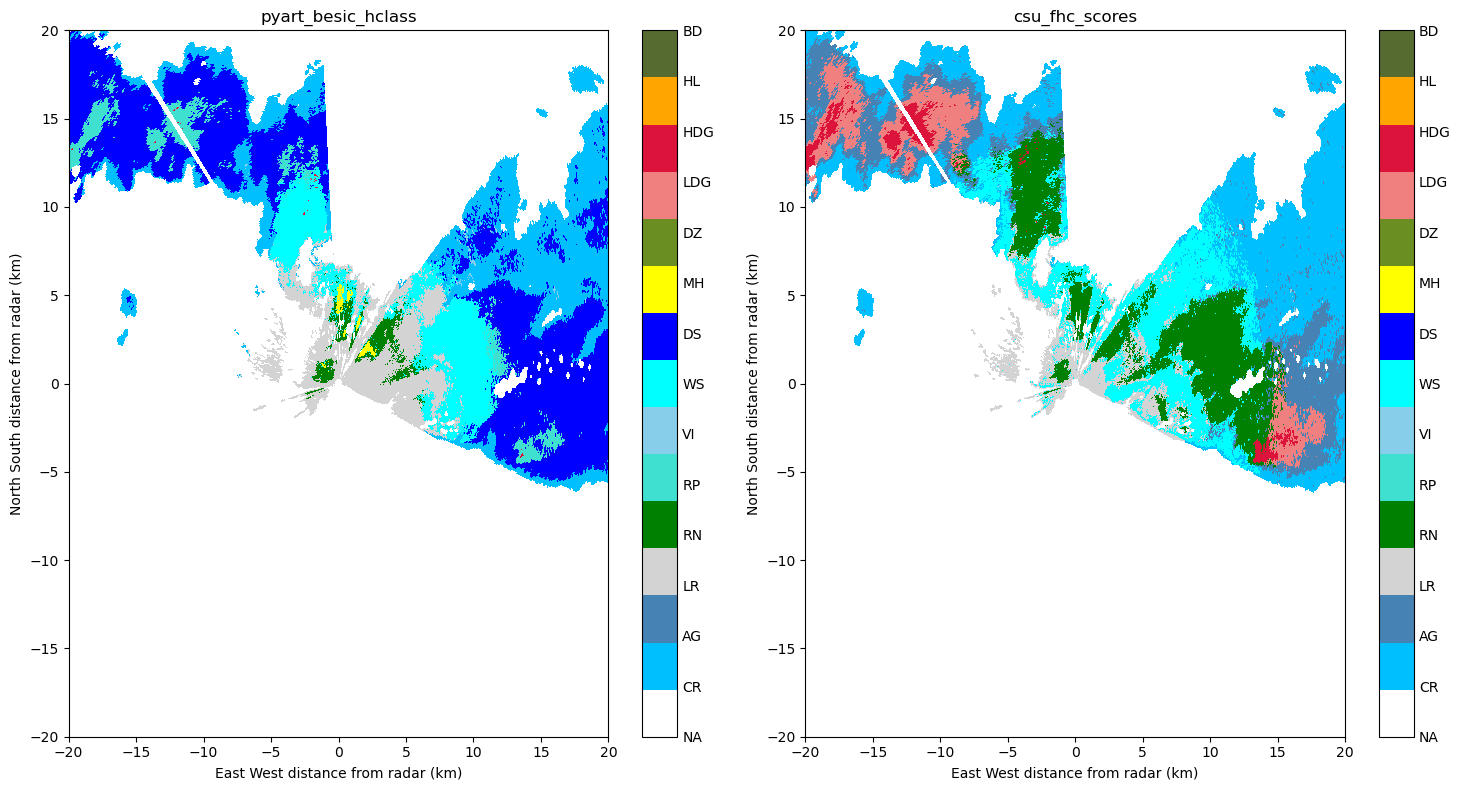

In [7]:

from matplotlib import colors

# colors for uhid
sn_colors = [
    'white',         # Unknown (0)
    'DeepSkyBlue',   # Crystals (1)
    'SteelBlue',     # Aggregates (2)
    'lightgrey',     # Light Rain (3)
    'Green',         # Rain (4)
    'Turquoise',     # Rimed Ice Particles (5)
    'SkyBlue',       # Vertical Ice (6)
    'Cyan',          # Wet Snow (7)
    'Blue',          # Dry Snow (8)
    'Yellow',        # Melting Hail (9)
    'OliveDrab',     # Drizzle (10)
    'LightCoral',     # Low-Density Graupel (11)
    'Crimson',       # High-Density Graupel (12)
    'Orange',           # Hail (13)
    'DarkOliveGreen' # Big Drops (14)
]

cmaphid = colors.ListedColormap(sn_colors)
sn_labels = [
    'NA',  'CR', 'AG', 'LR', 'RN', 'RP', 'VI', 
    'WS', 'DS', 'MH', 'DZ', 'LDG', 'HDG', 'HL', 'BD'
]

def plot_hid(radar, lim=[-20, 20], sweep=0):
    display = pyart.graph.RadarDisplay(radar)
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    for ax, field, title in zip(axes, ['pyart_besic_hclass', 'csu_fhc_scores'], ['pyart_besic_hclass', 'csu_fhc_scores']):
        display.plot_ppi(field, sweep=sweep, vmin=0, vmax=14, cmap=cmaphid, ax=ax,
        colorbar_label='', mask_outside=True)
        display.set_limits(xlim=lim, ylim=lim, ax=ax)

        ax.set_title(title)
        colorbar = display.cbs[-1]
        colorbar.set_ticks(np.arange(0, 15))
        colorbar.ax.set_yticklabels(sn_labels)
        colorbar.ax.tick_params(length=0)
    
    plt.tight_layout()
    plt.show()


plot_hid(radar)
